In [76]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns


In [77]:
LOW_QUANTILE = 0.25
HIGH_QUANTILE = 0.2501

# Create a Folder to Store the Results
import os

if not os.path.exists("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE)):
    os.mkdir("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE))
    
save_path = "Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE) + "/"

## Data

### mRNA Expression Data

In [78]:
mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma mRNA.csv")
mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [79]:
full_mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Pancancer mRNA.csv")
full_mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Gene Dependency Data

In [80]:
dependency_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Gene Dependency.csv", dtype={'Cell Line': str})
dependency_df.drop(['Unnamed: 0'], axis=1, inplace=True)


### Cell Lines Data

In [81]:
cell_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Cells.csv")
cell_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(cell_df.shape)

(41, 8)


### Chromatin Modifying Genes

In [82]:
chromatin_genes_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Chromatin Genes.csv")
chromatin_genes_df.head(5)

,Gene
0,ACTB
1,ACTL6A
2,ACTL6B
3,AKAP8
4,AKAP8L


## Analysis

### Validating Assumptions / mRNA Quartiles

#### Normality Test (Shapiro-Wilk Test) for mRNA Expression and Gene Dependency

In [83]:
# Shapiro-Wilk Test for Normality for All Genes in Gene mRNA Expression Data
# Interpretation: p-value < 0.05, therefore  mRNA data is not normally distributed
results = []
for gene in mRNA_df.columns[1:]:
    results.append((gene,stats.shapiro(mRNA_df[gene])[0],stats.shapiro(mRNA_df[gene])[1]))
    
shapiro_df = pd.DataFrame(results, columns=['Gene','W-Stat','p-value'])
print(shapiro_df.shape)
print(mRNA_df.shape)
print('number of genes that are normally distributed: ', len(shapiro_df[shapiro_df['p-value'] > 0.05]))
    

c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(19193, 3)
(41, 19194)
number of genes that are normally distributed:  8504


#### mRNA Quartiles (Pancancer mRNA & Melanoma mRNA)

##### Chromatin mRNA Subset

In [84]:
mRNA_genes = mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(mRNA_genes))

chromatin_vip_df = mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

chromatin_genes_quantiles.head(5)

(41, 497)
499


,TCF21,SRCAP,NFYA,LEF1,DYDC1,SMARCB1,WDR5,NCOA1,PHC2,NPM2,...,MBD4,KMT2A,BRD1,ARID4A,KANSL1,PRKD1,CBX8,CTCF,SUV39H1,COPRS
0.2500,0.0,2.869871,3.594549,5.589464,0.0,5.96786,4.414812,2.446256,6.320485,0.056584,...,4.254745,3.228049,3.344828,2.182692,3.719183,3.032101,2.666757,4.417515,3.215679,5.870858
0.2501,0.0,2.870541,3.595207,5.589515,0.0,5.96803,4.414839,2.446340,6.320501,0.056639,...,4.254796,3.228129,3.345079,2.182806,3.719257,3.032157,2.666927,4.417932,3.215910,5.870976


In [85]:
full_mRNA_genes = full_mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(full_mRNA_genes))

chromatin_vip_df = full_mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

full_chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
full_chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

full_chromatin_genes_quantiles.head(5)

(1407, 497)
499


,TCF21,SRCAP,NFYA,LEF1,DYDC1,SMARCB1,WDR5,NCOA1,PHC2,NPM2,...,MBD4,KMT2A,BRD1,ARID4A,KANSL1,PRKD1,CBX8,CTCF,SUV39H1,COPRS
0.2500,0.0,2.801157,3.574102,0.321928,0.0,5.737821,4.607626,2.263034,4.947900,0.176323,...,4.19928,3.577127,3.329841,2.469886,3.725196,0.084064,2.185867,4.478001,3.034744,5.123087
0.2501,0.0,2.801739,3.574102,0.321928,0.0,5.738239,4.607626,2.263034,4.947966,0.176323,...,4.19950,3.577296,3.330043,2.469886,3.725349,0.084064,2.185867,4.478274,3.034991,5.123203


### T-Tests Between mRNA Quartiles

#### Chromatin mRNA Quartile T-Tests

In [86]:
results = []
chromatin_gene_groups = pd.DataFrame()

for gene in intersection:
    # Index by gene column and then quantile row index
    low_expression = full_chromatin_genes_quantiles[gene][LOW_QUANTILE]
    
    # Testing for > 25th percentile or < 75th percentile
    high_expression = full_chromatin_genes_quantiles[gene][HIGH_QUANTILE]
    
    # Create a filter and then index by the gene column
    low_expression_cells = mRNA_df[mRNA_df[gene] <= low_expression][['Cell Line',gene]]
    high_expression_cells = mRNA_df[mRNA_df[gene] > high_expression][['Cell Line',gene]]
    
    # T-Test of Gene mRNA Levels in Low and High Expression Cells
    ttest = stats.ttest_ind(low_expression_cells[gene], high_expression_cells[gene],  alternative = 'two-sided')
    
    # Append the results to the results list
    # Format: (Gene, Low Samples, Low Expression Mean, High Samples High Expression Mean, T-Stat, P-Value)
    results.append((gene, len(low_expression_cells), low_expression_cells[gene].mean(), len(high_expression_cells), high_expression_cells[gene].mean(), ttest[0], ttest[1]))
    
    # Add a column to the low expression cells called "Group" and assign it the value "low"
    low_expression_cells['Group'] = 'low'
    high_expression_cells['Group'] = 'high'
    
    # Sort the cells by cell line so that they are in the same order as the gene_groups dataframe
    expression = pd.concat([low_expression_cells, high_expression_cells])
    expression.sort_values(by=['Cell Line'], inplace=True)
    
    # Append the low and high expression cells to the gene_groups list
    chromatin_gene_groups = pd.concat([chromatin_gene_groups, expression['Group']], axis=1)
    chromatin_gene_groups.rename(columns={'Group': gene}, inplace=True)
    
    
    
chromatin_ttest_df = pd.DataFrame(results, columns=['Gene','Low Samples','Low Expression Mean','High Samples','High Expression Mean','T-Stat','P-Value'])
print(chromatin_ttest_df.shape)
print("Number of Genes with Significant Difference in Expression: ", len(chromatin_ttest_df[chromatin_ttest_df['P-Value'] < 0.05]))
chromatin_ttest_df.sort_values(by=['Gene'], inplace=True)
chromatin_ttest_df.reset_index(inplace=True, drop=True)
chromatin_ttest_df.head(5)
    


C:\Users\commo\AppData\Local\Temp\ipykernel_25624\1438953376.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_cells[gene], high_expression_cells[gene],  alternative = 'two-sided')
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\commo\AppData\Local\Temp\ipykernel_25624\1438953376.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are

(497, 7)
Number of Genes with Significant Difference in Expression:  458


,Gene,Low Samples,Low Expression Mean,High Samples,High Expression Mean,T-Stat,P-Value
0,ACTB,7,10.251067,34,11.469672,-6.299219,1.989668e-07
1,ACTL6A,4,6.015171,37,6.665922,-3.970089,2.994453e-04
2,ACTL6B,24,0.000000,17,0.075306,-5.489511,2.647362e-06
3,AKAP8,9,3.283049,32,4.282318,-9.726946,5.571662e-12
4,AKAP8L,14,4.601761,27,5.202888,-7.365675,6.780194e-09


In [87]:
# Write to CSV
chromatin_ttest_df.sort_values(by=['Low Samples','High Samples'], ascending=[False,True], inplace=True)
chromatin_ttest_df.reset_index(drop=True, inplace=True)
chromatin_ttest_df.to_csv(save_path + 'M mRNA T-Test Results( less ' + str(LOW_QUANTILE) + ' greater ' + str(HIGH_QUANTILE) + ' ).csv')

### T-Tests for Chronos Scores by mRNA Groups

#### Optional Filter

In [88]:
FILTERED = 1

# Filter the groups by ones with both low and high sample sizes > 10
chromatin_ttest_df_genes_filter = chromatin_ttest_df[(chromatin_ttest_df['Low Samples'] > 2) & (chromatin_ttest_df['High Samples'] > 10)]

# Retrieve the Genes
chromatin_ttest_df_genes_filter = chromatin_ttest_df_genes_filter ['Gene']

# Filter the gene groups by the filtered genes
chromatin_gene_groups_filtered = chromatin_gene_groups[chromatin_ttest_df_genes_filter]

# VALIDATION OF GENE GROUPS LOW SAMPLES KNOCKOUT
"""validated = []
for gene in chromatin_gene_groups_filtered.columns:
    # Cell Lines
    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']
    
    # Filter the dependency dataframe by the cell lines
    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]
    
    # Print the Mean Dependency Score
    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())
    
    if low_expression_dependency[gene].mean() <= .1:
        validated.append(gene)
    else:
        continue
    
print('Number of Validated Genes: ', len(validated))
chromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]"""
    

    
    




"validated = []\nfor gene in chromatin_gene_groups_filtered.columns:\n    # Cell Lines\n    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']\n    \n    # Filter the dependency dataframe by the cell lines\n    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]\n    \n    # Print the Mean Dependency Score\n    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())\n    \n    if low_expression_dependency[gene].mean() <= .1:\n        validated.append(gene)\n    else:\n        continue\n    \nprint('Number of Validated Genes: ', len(validated))\nchromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]"

#### T-Tests

In [89]:
if FILTERED:
    print('Filtered')
    chromatin_gene_groups = chromatin_gene_groups_filtered
    
gene_groups = chromatin_gene_groups

gene_groups = gene_groups.reindex(sorted(gene_groups.columns), axis=1)
print(gene_groups.shape)
gene_groups.head(5)

Filtered
(41, 442)


,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZZZ3
0,high,high,low,high,high,high,high,high,high,high,...,high,high,high,high,high,low,high,high,high,high
1,low,high,low,high,high,high,high,high,high,high,...,high,high,high,high,high,low,high,high,high,high
2,high,high,high,high,high,high,high,high,high,high,...,high,high,high,low,high,low,high,low,high,low
3,high,high,high,high,low,high,low,high,high,low,...,high,low,low,high,high,low,low,low,high,low
4,high,high,high,high,low,low,high,high,high,low,...,high,low,low,high,high,high,high,high,high,high


In [90]:
# Concatenate the vip genes dataframes
vip_genes = pd.Series(list(gene_groups.columns))
vip_genes.sort_values(inplace=True)
vip_genes.reset_index(drop=True, inplace=True)
print(vip_genes.shape)
vip_genes.head(5)

(442,)


0      ACTB
1    ACTL6A
2    ACTL6B
3     AKAP8
4    AKAP8L
dtype: object

##### Left-Sided T-Test

In [91]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(442, 442)


C:\Users\commo\AppData\Local\Temp\ipykernel_25624\1436156346.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')


In [92]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[np.isnan(gene_effect_matrix).any(axis=1)]

In [93]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_plot.shape[0] * gene_effect_matrix_plot.shape[1])
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')

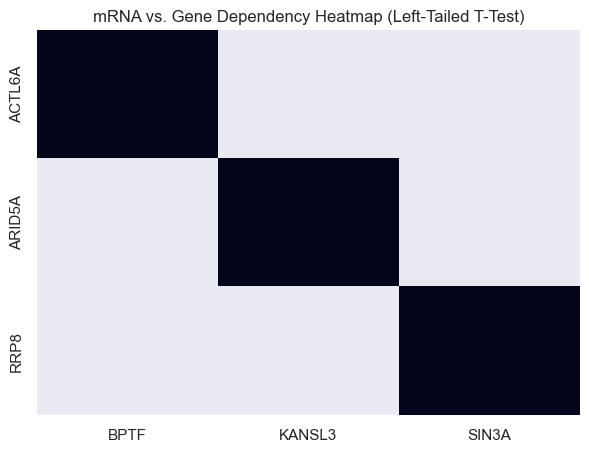

In [94]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.heatmap(significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all'), vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)
plt.title('mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')


Text(0.5, 0, 'ZMPSTE24 mRNA Expression')

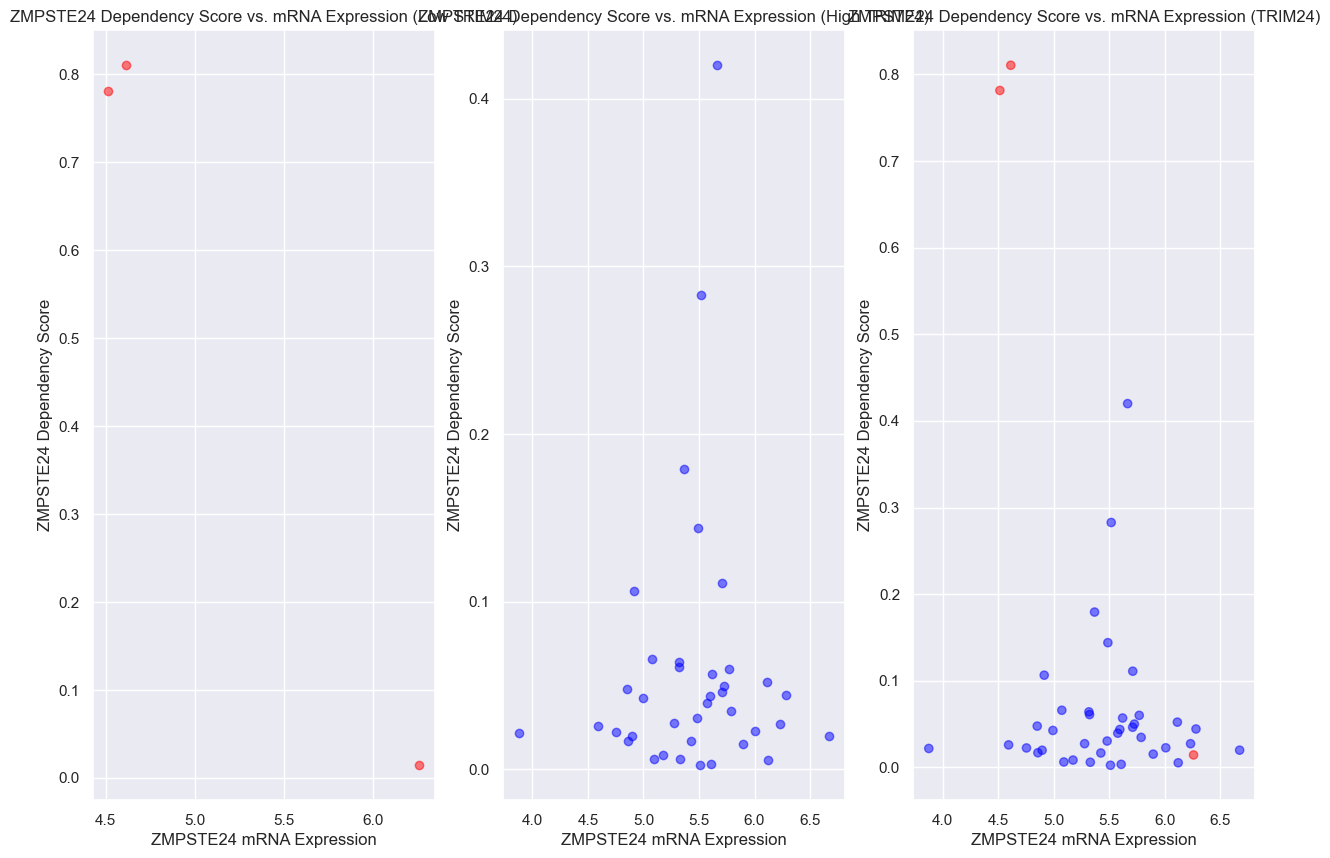

In [95]:
# Manual Validation
gene = 'TRIM24'
gene2 = 'ZMPSTE24'
g1_expression = gene_groups[gene].index
g1_low_expression = gene_groups[gene_groups[gene] == 'low'].index
g1_high_expression = gene_groups[gene_groups[gene] == 'high'].index

g1_mrna = mRNA_df[gene]
g1_low_mrna = mRNA_df.loc[g1_low_expression, gene]
g1_high_mrna = mRNA_df.loc[g1_high_expression, gene]

g2_dependency = dependency_df[gene2]
g2_low_dependency = dependency_df.loc[g1_low_expression, gene2]
g2_high_dependency = dependency_df.loc[g1_high_expression, gene2]


g2_low_mrna = mRNA_df.loc[g1_low_expression, gene2]
g2_high_mrna = mRNA_df.loc[g1_high_expression, gene2]

# combine g2 low mrna and g2 high mrna to a dataframe
g2_mrna = pd.concat([g2_low_mrna, g2_high_mrna], axis=0)
g2_mrna = g2_mrna.to_frame()
g2_mrna['color'] = ['red'] * g2_low_mrna.shape[0] + ['blue'] * g2_high_mrna.shape[0]
g2_mrna.sort_index(inplace=True)




fig,ax = plt.subplots(1,3,figsize=(15,10))
sns.set(font_scale=1)


ax[0].scatter(g2_low_mrna, g2_low_dependency, color='red', alpha=0.5)
ax[0].set_title(gene2 + ' Dependency Score vs. mRNA Expression (Low ' + gene + ')')
ax[0].set_ylabel(gene2 + ' Dependency Score')
ax[0].set_xlabel(gene2 + ' mRNA Expression')

ax[1].scatter(g2_high_mrna, g2_high_dependency, color='blue', alpha=0.5)
ax[1].set_title(gene2 + ' Dependency Score vs. mRNA Expression (High ' + gene + ')')
ax[1].set_ylabel(gene2 + ' Dependency Score')
ax[1].set_xlabel(gene2 + ' mRNA Expression' )

# color by label
ax[2].scatter(g2_mrna.iloc[:,0], g2_dependency, color=g2_mrna['color'], alpha=0.5)
ax[2].set_title(gene2 + ' Dependency Score vs. mRNA Expression (' + gene + ')')
ax[2].set_ylabel(gene2 + ' Dependency Score')
ax[2].set_xlabel(gene2 + ' mRNA Expression' )
 


##### Right Sided T-Test

In [96]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(442, 442)


C:\Users\commo\AppData\Local\Temp\ipykernel_25624\2010492129.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')


In [97]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[np.isnan(gene_effect_matrix).any(axis=1)]

In [98]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_plot.shape[0] * gene_effect_matrix_plot.shape[1])
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [99]:
# rows that arent = 1
significant_rows_df[significant_rows_df != 1].dropna(axis=0, how='all').dropna(axis=1, how='all')

,ASH1L,PHF20L1,SMYD2,ZMPSTE24
CHD1,NaN,1.918095e-07,NaN,NaN
NAP1L3,4.115858e-09,NaN,NaN,NaN
TRIM24,NaN,NaN,NaN,1.615497e-07
UHRF2,NaN,NaN,1.419591e-07,NaN


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

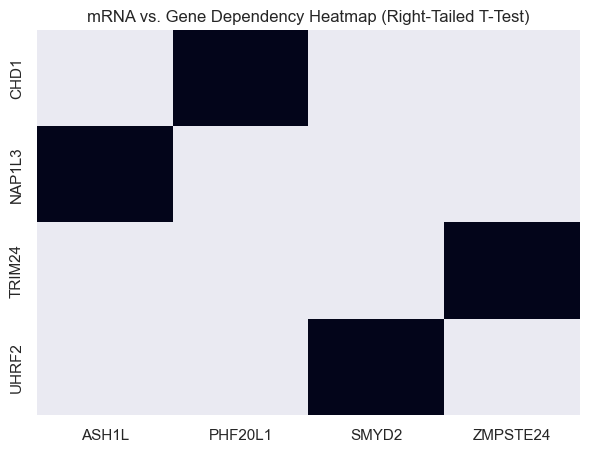

In [100]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
significant_rows_df_filter = significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)

plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


Text(0.5, 0, 'NAA50 mRNA Expression')

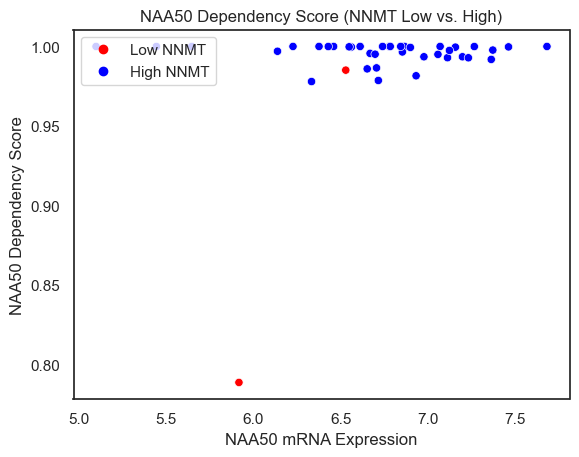

In [ ]:
import matplotlib.lines as mlines

# color by label
sns.set_style("white")
sns.scatterplot(x = g2_mrna.iloc[:,0], y = g2_dependency, hue=g2_mrna['color'].tolist(), palette=['blue', 'red'])
plt.title(gene2 + ' Dependency Score (' + gene + ' Low vs. High' + ')')

red_patch = mlines.Line2D([], [], color='red', marker='o', linestyle='None')
blue_patch =  mlines.Line2D([], [], color='blue', marker='o', linestyle='None')
plt.legend(loc='upper left', labels=['Low ' + gene, 'High ' + gene], handles=[red_patch, blue_patch])
plt.ylabel(gene2 + ' Dependency Score')
plt.xlabel(gene2 + ' mRNA Expression' )

In [ ]:
# Index of the significant rows
significant_rows_df_filter.index

Index(['CHD1', 'NAP1L3', 'NNMT', 'SMYD1', 'TRIM24', 'UHRF2'], dtype='object')

In [ ]:
# For each column, grab the corresponding gene with a p-value < 0.05
sig_genes = []
for col in significant_rows_df_filter.columns:
    if len(significant_rows_df[col][significant_rows_df[col] < BONFERONNI_PVALUE].index) > 1:
        for gene in significant_rows_df[col][significant_rows_df[col] < BONFERONNI_PVALUE].index:
            sig_genes.append((gene, col))
    else:
        sig_genes.append((significant_rows_df[col][significant_rows_df[col] < BONFERONNI_PVALUE].index[0], col))
    
print(sig_genes)

[('NAP1L3', 'ASH1L'), ('SMYD1', 'GLYR1'), ('NNMT', 'ING2'), ('SMYD1', 'KDM4D'), ('CHD1', 'PHF20L1'), ('UHRF2', 'SMYD2'), ('TRIM24', 'ZMPSTE24')]


##### Two-Sided T-Test

In [135]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1]))
gene_diff_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1]))
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'two-sided')
        
        # Difference in Gene Dependency in Low and High Expression Cells
        gene_diff_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = np.median(low_expression_dependency) - np.median(high_expression_dependency)
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(442, 442)


C:\Users\commo\AppData\Local\Temp\ipykernel_25624\830098971.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'two-sided')


In [103]:
# Convert to DF
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Log Transform
log_gene_effect_matrix_df = -np.log10(gene_effect_matrix_df)

# Convert to DF
gene_diff_matrix_df = pd.DataFrame(gene_diff_matrix, columns=vip_genes, index=vip_genes)

In [138]:
gene_diff_matrix_df[gene_diff_matrix_df > .6].dropna(axis=0, how='all').dropna(axis=1, how='all')

,PAXIP1
ACTL6A,0.620597


Text(0, 0.5, 'Log of p-value of Gene Dependency in Low vs. High Expression Cells')

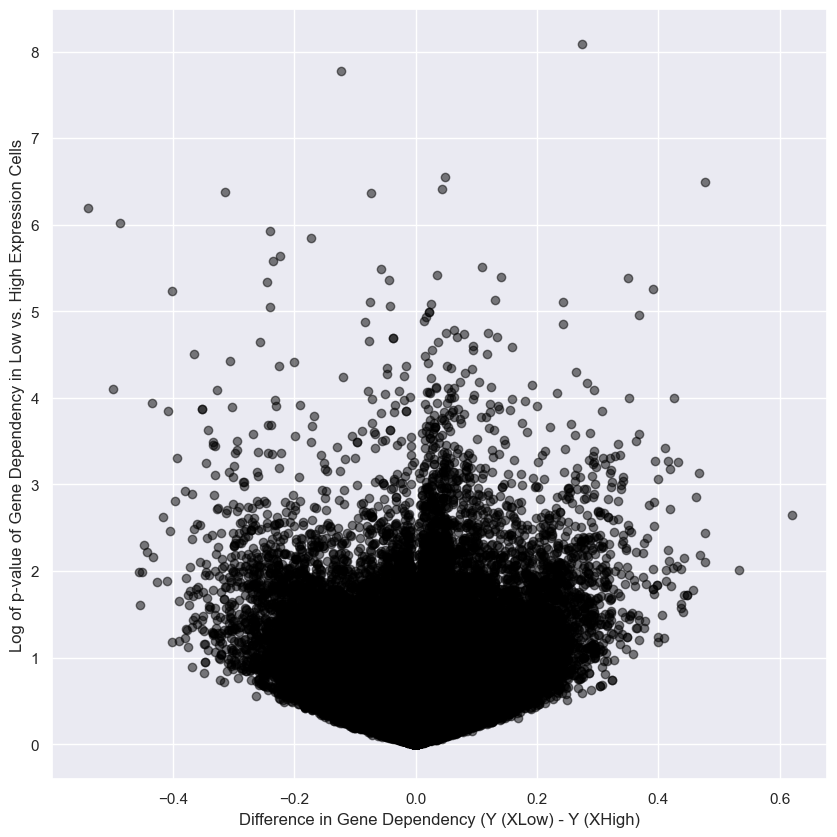

In [134]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='black')

# Axis Labels
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)')
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells')

In [128]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_df.shape[0] * gene_effect_matrix_df.shape[1])
MANUAL = 6
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[log_gene_effect_matrix_df > MANUAL]

# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [129]:
significant_rows_df[significant_rows_df != 1].dropna(axis=0, how='all').dropna(axis=1, how='all')

,ASH1L,BPTF,INO80,KANSL3,NUP62,PHF20L1,SIN3A,SMYD2,ZMPSTE24
ACTL6A,NaN,4.171513e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARID5A,NaN,NaN,NaN,1.671306e-08,NaN,NaN,NaN,NaN,NaN
CBX8,NaN,NaN,NaN,NaN,6.366378e-07,NaN,NaN,NaN,NaN
CHD1,NaN,NaN,NaN,NaN,NaN,3.836190e-07,NaN,NaN,NaN
NAP1L3,8.231716e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PHF19,NaN,NaN,9.579741e-07,NaN,NaN,NaN,NaN,NaN,NaN
RRP8,NaN,NaN,NaN,NaN,NaN,NaN,4.265555e-07,NaN,NaN
TRIM24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.230994e-07
UHRF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.839181e-07,NaN


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

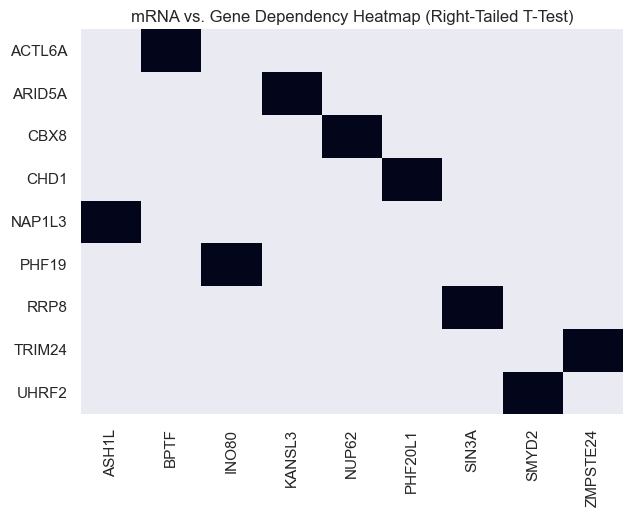

In [133]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
significant_rows_df_filter = significant_rows_df[log_gene_effect_matrix_df > MANUAL].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)

plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


#### Figures Factory

Text(0.5, 0, 'PAXIP1 mRNA Expression')

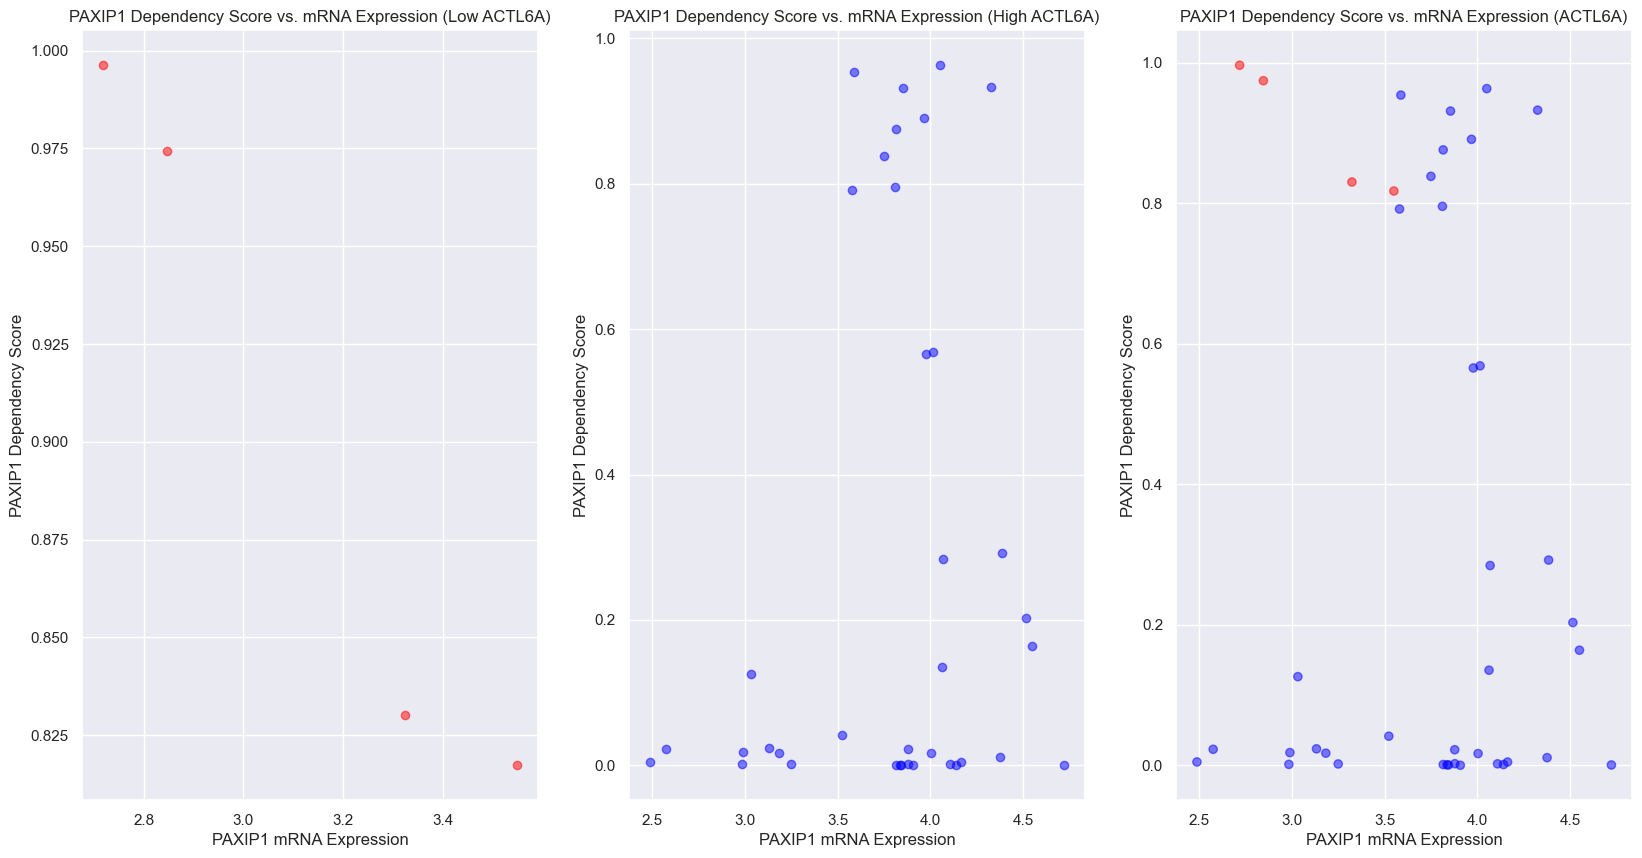

In [141]:
# Manual Validation
gene = 'ACTL6A'
gene2 = 'PAXIP1'
g1_expression = gene_groups[gene].index
g1_low_expression = gene_groups[gene_groups[gene] == 'low'].index
g1_high_expression = gene_groups[gene_groups[gene] == 'high'].index

g1_mrna = mRNA_df[gene]
g1_low_mrna = mRNA_df.loc[g1_low_expression, gene]
g1_high_mrna = mRNA_df.loc[g1_high_expression, gene]

g2_dependency = dependency_df[gene2]
g2_low_dependency = dependency_df.loc[g1_low_expression, gene2]
g2_high_dependency = dependency_df.loc[g1_high_expression, gene2]


g2_low_mrna = mRNA_df.loc[g1_low_expression, gene2]
g2_high_mrna = mRNA_df.loc[g1_high_expression, gene2]

# combine g2 low mrna and g2 high mrna to a dataframe
g2_mrna = pd.concat([g2_low_mrna, g2_high_mrna], axis=0)
g2_mrna = g2_mrna.to_frame()
g2_mrna['color'] = ['red'] * g2_low_mrna.shape[0] + ['blue'] * g2_high_mrna.shape[0]
g2_mrna.sort_index(inplace=True)




fig,ax = plt.subplots(1,3,figsize=(20,10))
sns.set(font_scale=1)


ax[0].scatter(g2_low_mrna, g2_low_dependency, color='red', alpha=0.5)
ax[0].set_title(gene2 + ' Dependency Score vs. mRNA Expression (Low ' + gene + ')')
ax[0].set_ylabel(gene2 + ' Dependency Score')
ax[0].set_xlabel(gene2 + ' mRNA Expression')

ax[1].scatter(g2_high_mrna, g2_high_dependency, color='blue', alpha=0.5)
ax[1].set_title(gene2 + ' Dependency Score vs. mRNA Expression (High ' + gene + ')')
ax[1].set_ylabel(gene2 + ' Dependency Score')
ax[1].set_xlabel(gene2 + ' mRNA Expression' )

# color by label
ax[2].scatter(g2_mrna.iloc[:,0], g2_dependency, color=g2_mrna['color'], alpha=0.5)
ax[2].set_title(gene2 + ' Dependency Score vs. mRNA Expression (' + gene + ')')
ax[2].set_ylabel(gene2 + ' Dependency Score')
ax[2].set_xlabel(gene2 + ' mRNA Expression' )
 
